# Data Visualization Notebook
This notebook demonstrates various visualizations for the student dataset.

In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Add src directory to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from visualization import DataVisualizer

## Initialize Data Visualizer

In [2]:
# Initialize the visualizer with cleaned data
input_path = '../data/students_cleaned.csv'
visualizer = DataVisualizer(input_path)

# Get the dataframe
df = visualizer.df

# Display first few rows
df.head()

,student_id,first_name,last_name,gender,email,age,study_hours,quiz_participation,past_performance,course_completion,study_hours_norm,engagement,age_bucket
0,S001,Benjamin,Kiernan,Male,x001@student.ncirl.ie,20,12.14,89.0,95.0,False,0.513428,0.664057,19-24
1,S002,Callan,McVicker,Male,x002@student.ncirl.ie,25,9.37,86.9,56.0,True,0.396278,0.585367,25-34
2,S003,Fintan,Deere,Male,x003@student.ncirl.ie,20,12.79,82.7,60.0,False,0.540918,0.655351,19-24
3,S004,Sorcha,Cally,Female,x004@student.ncirl.ie,21,9.28,65.6,57.0,False,0.392472,0.497883,19-24
4,S005,Kane,Swift,Male,x005@student.ncirl.ie,29,7.78,95.8,51.0,True,0.329034,0.580620,25-34


## Grade Distribution

C:\Users\tomas\AppData\Local\Temp\ipykernel_15480\120592992.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='past_performance', palette='pastel')


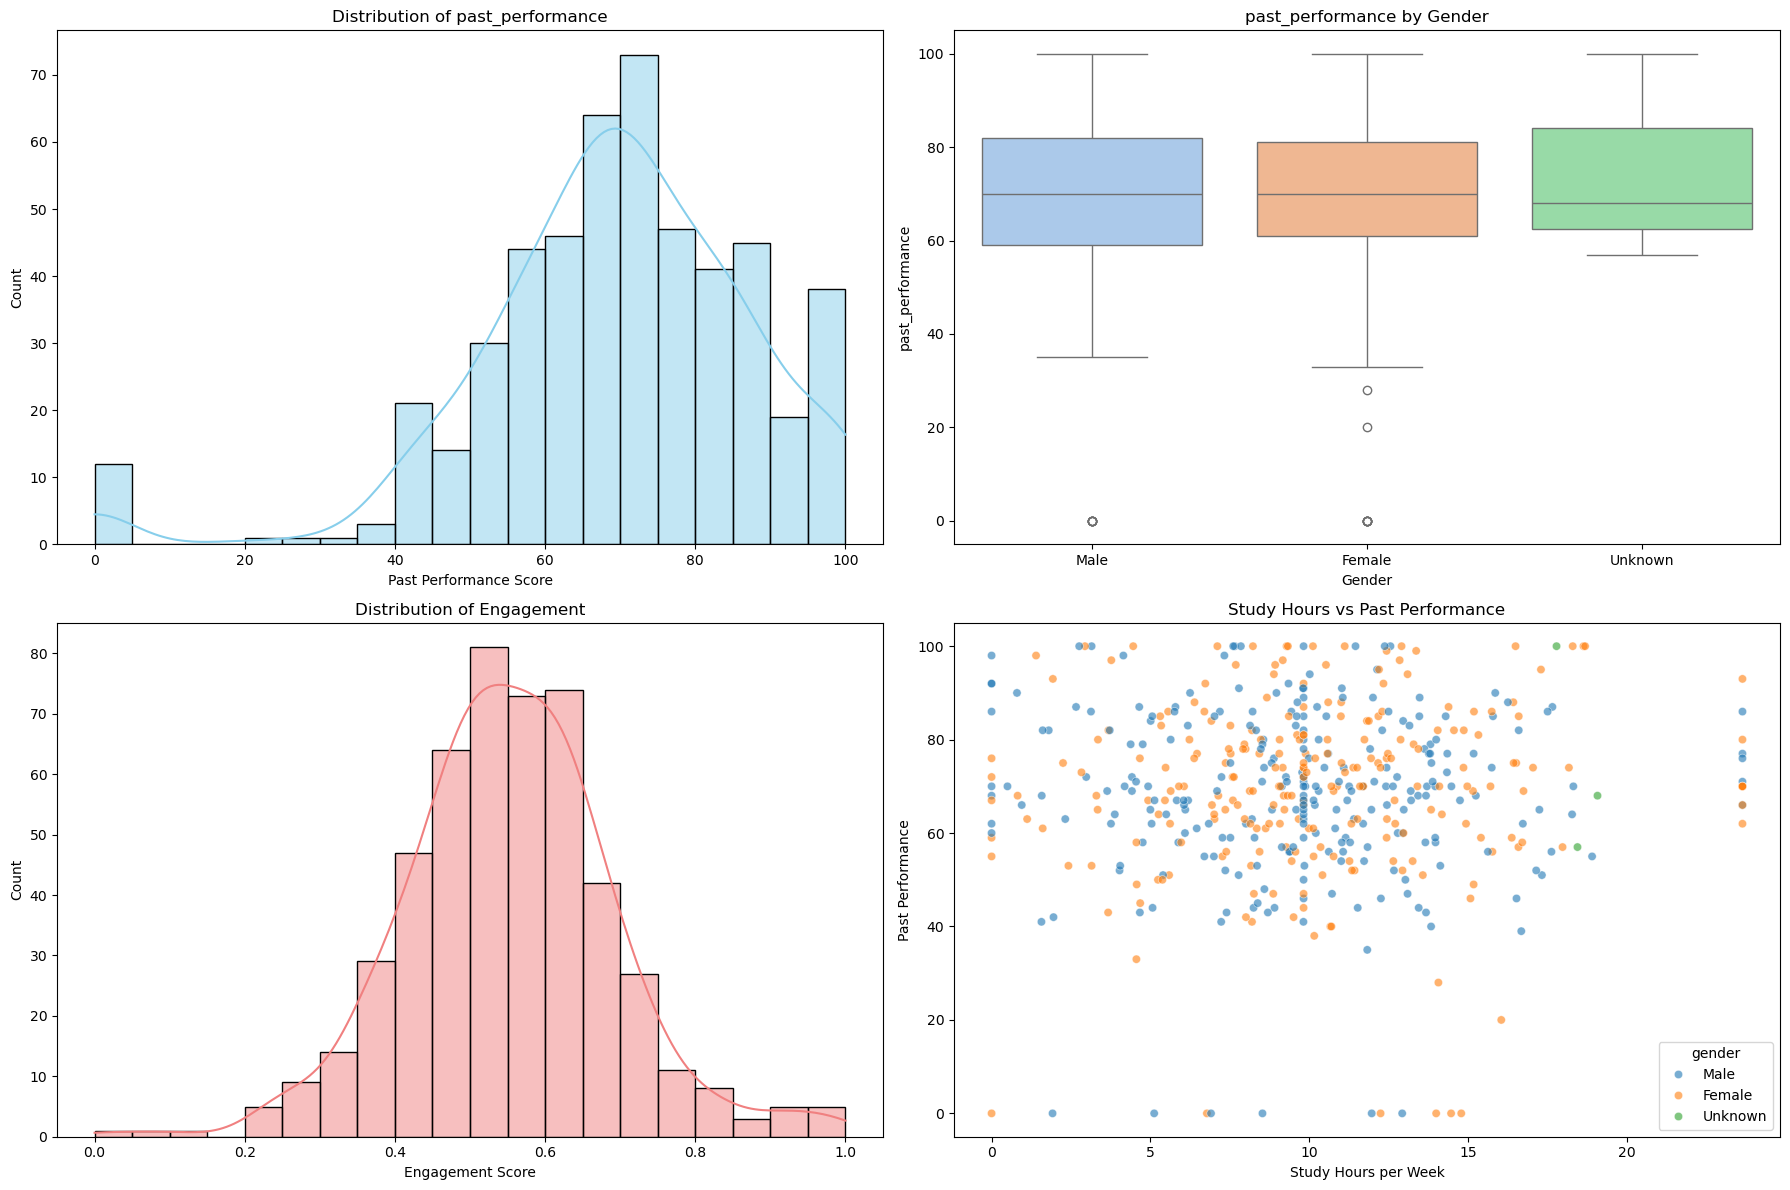

In [7]:
# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Histogram of past_performance
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='past_performance', bins=20, kde=True, color='skyblue')
plt.title('Distribution of past_performance')
plt.xlabel('Past Performance Score')
plt.ylabel('Count')

# Box plot of past_performance by gender
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='gender', y='past_performance', palette='pastel')
plt.title('past_performance by Gender')
plt.xlabel('Gender')
plt.ylabel('past_performance')

# Histogram of engagement
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='engagement', bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Engagement')
plt.xlabel('Engagement Score')
plt.ylabel('Count')

# Scatter plot of study_hours vs past_performance
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='study_hours', y='past_performance', hue='gender', alpha=0.6)
plt.title('Study Hours vs Past Performance')
plt.xlabel('Study Hours per Week')
plt.ylabel('Past Performance')

plt.tight_layout()
plt.show()

## Correlation Analysis

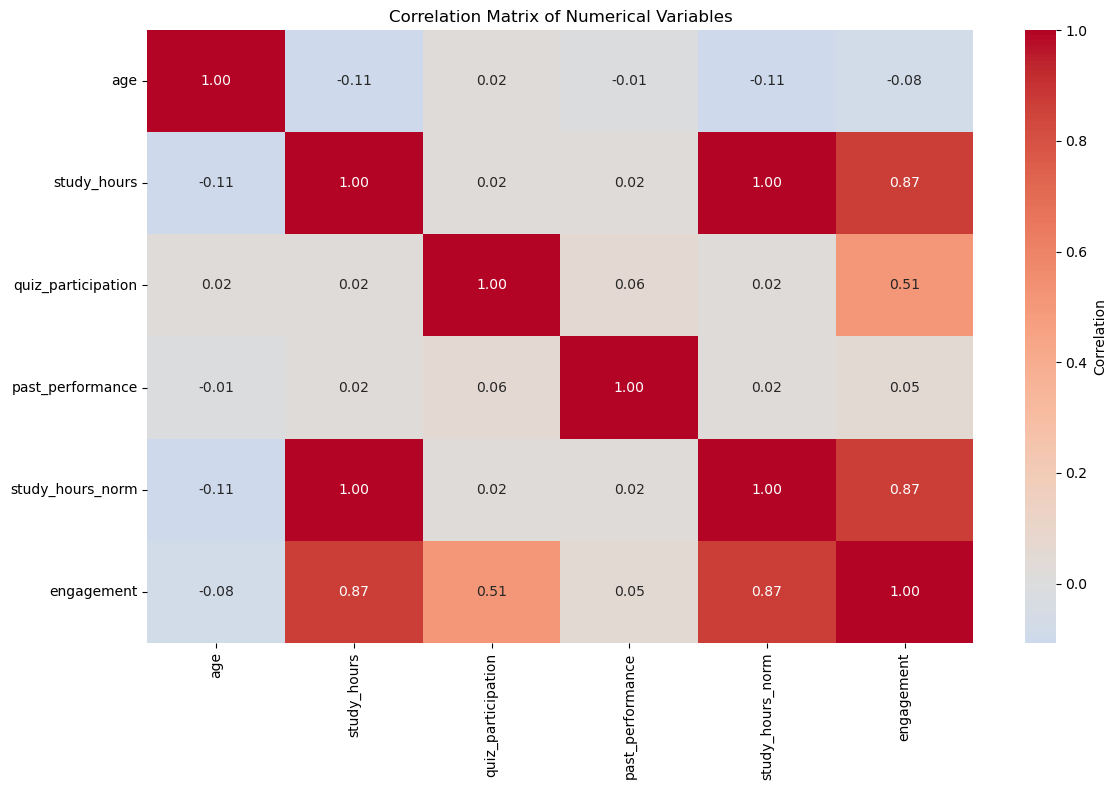

<Figure size 1200x1000 with 0 Axes>

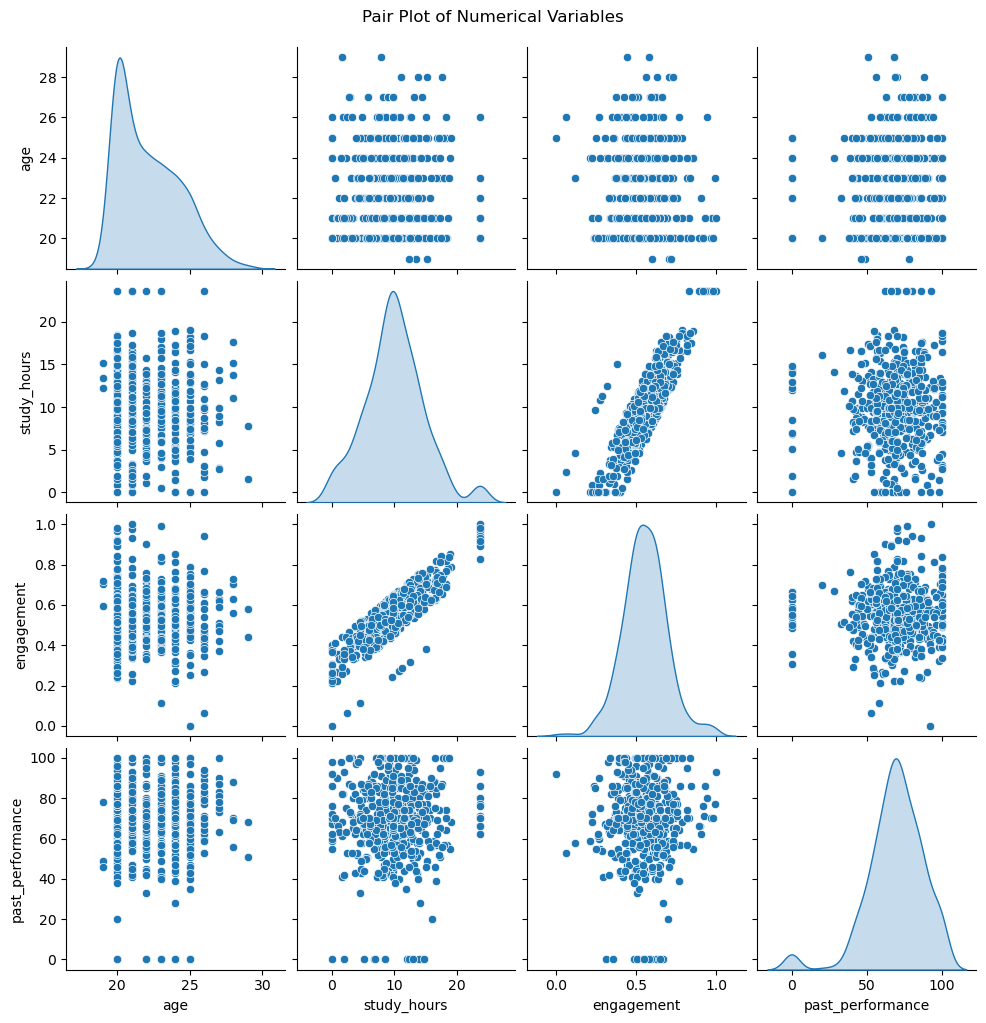

In [8]:
# Calculate correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Create a pair plot for selected numerical variables (use available columns)
plt.figure(figsize=(12, 10))
sns.pairplot(df[['age', 'study_hours', 'engagement', 'past_performance']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

## Save Visualizations

In [9]:
# Ensure the reports directory exists
os.makedirs('../reports/figures', exist_ok=True)

# Save the last figure
plt.savefig('../reports/figures/student_analysis_summary.png', dpi=300, bbox_inches='tight')
print("Visualizations saved to 'reports/figures/' directory")

Visualizations saved to 'reports/figures/' directory


<Figure size 640x480 with 0 Axes>